In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.sample(5)

,Unnamed: 0,YearsExperience,Salary
3,3,2.1,43526.0
23,23,8.3,113813.0
20,20,6.9,91739.0
0,0,1.2,39344.0
19,19,6.1,93941.0


In [3]:
df.set_index('Unnamed: 0',inplace=True)

In [4]:
df.head()

,YearsExperience,Salary
Unnamed: 0,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
df.shape

(30, 2)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
x=df['YearsExperience']
y=df['Salary']
x=x.to_numpy()
x=x.reshape(-1,1)

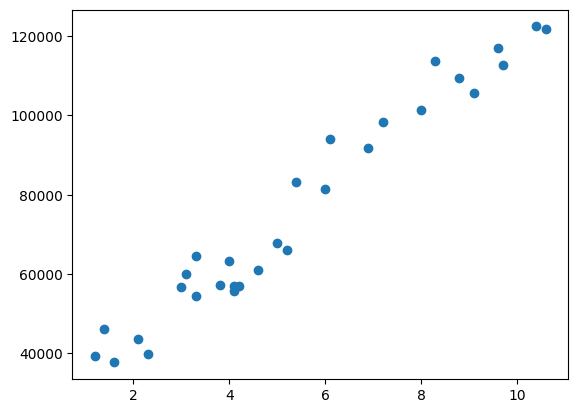

In [9]:
plt.scatter(x,y)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# y_train.shape

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(x_test)

In [15]:
print(r2_score(y_test,y_pred))

0.9024461774180497


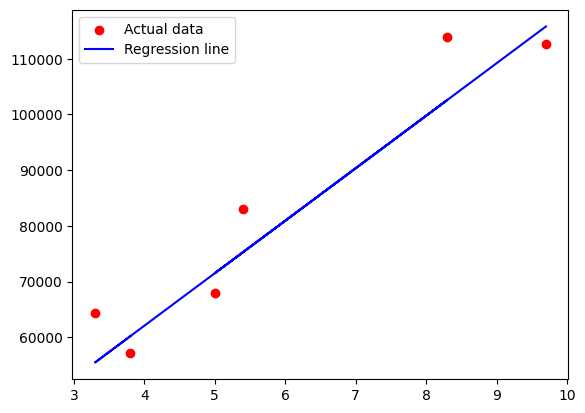

In [16]:
plt.scatter(x_test,y_test,color='red',label='Actual data')
plt.plot(x_test,y_pred,color='blue',label='Regression line')
plt.legend()

In [17]:
print(lr.coef_,lr.intercept_)

[9423.81532303] 24380.201479473704


# Using gradient descent

In [18]:
class MeraRegression:
    
    def __init__(self, learning_rate=0.01, epochs=350):
        
        self.m=1
        self.b=0
        self.learning_rate=learning_rate
        self.epochs=epochs
    
    def fit(self, x_train, y_train):
        
        for i in range(self.epochs):
            
            y_bar=self.m * x_train + self.b
        
            b_slope= -2 * np.sum(y_train - y_bar)
            
            m_slope= -2 * np.dot((y_train - y_bar),x_train)
        
            self.m=self.m - (self.learning_rate * m_slope)
        
            self.b=self.b - (self.learning_rate * b_slope)
        
        return self.m,self.b
    
    def predict(self, x_test):
        
        return self.m * x_test + self.b

In [19]:
mr=MeraRegression(learning_rate=0.001,epochs=350)

In [20]:
mr.fit(x_train.flatten(), y_train)

(9498.754724196844, 23869.48530424547)

In [21]:
y_pred1=mr.predict(x_test.flatten())

In [22]:
r2_score(y_test,y_pred1)

0.9014230070746747

In [23]:
r2_score(y_test,y_pred)

0.9024461774180497

In [24]:
y_pred1

array([116007.40612895,  71363.25892523, 102709.14951508,  75162.76081491,
        55215.3758941 ,  59964.75325619])

In [25]:
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge model
ridge = Ridge()

# Define parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Best alpha
print(f"Best alpha: {grid_search.best_params_}")

Best alpha: {'alpha': 1}


In [27]:
ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha as needed

# Fit the model on the training data
ridge_reg.fit(x_train, y_train)

y_pred2 = ridge_reg.predict(x_test)

# Evaluate the model (using mean squared error)
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 49974852.71999642


In [28]:
r2_score(y_test,y_pred2)

0.9021627846740264